<a href="https://colab.research.google.com/github/ProfAI/machine-learning-fondamenti/blob/main/4%20-%20La%20Classificazione/binary_classification_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Riconoscimento di tumori al seno maligni

Nello specifico, devi creare un modello di classificazione, in grado di riconoscere i tumori maligni, che:

1. Ha un accuracy sul set di test di almeno 0.98.
2. Ha un AUC sul set di test di almeno 0.98.
2. Ha un recall di 1 (0 falsi positivi).

Per valutare il modello, devi ricreare le seguenti visualizzazioni:

Una volta fatto, fornisci le previsioni per questi dati, salvando in un file excel:
1. L'ID paziente
2. La previsione del modello
3. La probabilità associata alla classe predetta

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve

In [126]:
BASE_URL=""
df = pd.read_csv(BASE_URL+"breast_cancer.csv", header=0)
df.head()

,ID number,diagnosis,radius mean,texture mean,perimeter mean,area mean,smoothness mean,compactness mean,concavity mean,concave points mean,symmetry mean,fractal dimension mean,radius se,texture se,perimeter mean.1,area se,smoothness se,compactness se,concavity se,concave points se,symmetry se,fractal dimension se,radius worst,texture worst,perimeter worst,area worst,smoothness worstse,compactness worst,concavity worst,concave points worst,symmetry worst,fractal dimension worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [127]:
df = df.drop("ID number", axis=1)

In [128]:
map_dict = {"M":1, "B":0}
df["diagnosis"] = df["diagnosis"].map(lambda x: map_dict[x])
df.head()

,diagnosis,radius mean,texture mean,perimeter mean,area mean,smoothness mean,compactness mean,concavity mean,concave points mean,symmetry mean,fractal dimension mean,radius se,texture se,perimeter mean.1,area se,smoothness se,compactness se,concavity se,concave points se,symmetry se,fractal dimension se,radius worst,texture worst,perimeter worst,area worst,smoothness worstse,compactness worst,concavity worst,concave points worst,symmetry worst,fractal dimension worst
0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [129]:
X = df.drop("diagnosis", axis=1).values
y = df["diagnosis"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [130]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [131]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [132]:
y_pred_train = lr.predict(X_train)
y_proba_train = lr.predict_proba(X_train)
y_pred_test = lr.predict(X_test)
y_proba_test =  lr.predict_proba(X_test)

print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       248
           1       0.99      0.97      0.98       146

    accuracy                           0.98       394
   macro avg       0.99      0.98      0.98       394
weighted avg       0.98      0.98      0.98       394

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       105
           1       0.97      0.98      0.98        64

    accuracy                           0.98       169
   macro avg       0.98      0.98      0.98       169
weighted avg       0.98      0.98      0.98       169



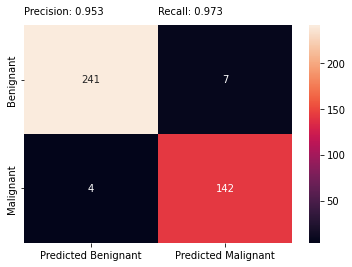

In [190]:
def plot_confusion_matrix(y_true, y_pred, labels=["Negative", "Positive"], show_precision_recall=True):

  cm = confusion_matrix(y_true, y_pred) # tn, fp, fn, tp 

  df_cm = pd.DataFrame(cm, index = labels,
                    columns = ["Predicted "+labels[0],"Predicted "+labels[1]])
  sns.heatmap(df_cm, annot=True, fmt='g')

  if show_precision_recall:
    # Quale percentuale di classificazione positive erano effettivamente positive ?
    plt.text(0, -0.1, f"Precision: {(cm[1][1]/(cm[1][1]+cm[0][1])):.3f}")
    # Quale percentuale di osservazioni positive sono state classificate come positive ?
    plt.text(1, -0.1, f"Recall: {(cm[1][1]/(cm[1][1]+cm[1][0])):.3f}")


y_pred_train = np.where(y_proba_train[:,1]>0.3,1,0)
plot_confusion_matrix(y_train, y_pred_train, ["Benignant", "Malignant"])

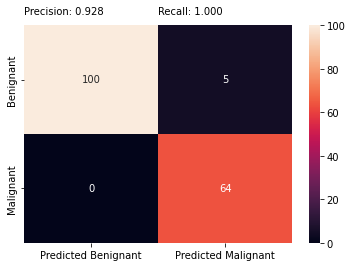

In [191]:
y_pred_test = np.where(y_proba_test[:,1]>0.3,1,0)
plot_confusion_matrix(y_test, y_pred_test, ["Benignant", "Malignant"])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


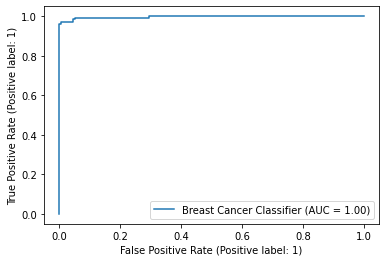

In [198]:
plot_roc_curve(lr, X_train, y_train, name="Cancer Classifier")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


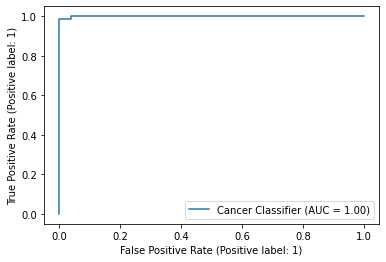

In [199]:
plot_roc_curve(lr, X_test, y_test, name="Cancer Classifier")

In [162]:
df_pred = pd.read_csv(BASE_URL+"breast_cancer_pred.csv")
df_pred.head()

,ID number,radius mean,texture mean,perimeter mean,area mean,smoothness mean,compactness mean,concavity mean,concave points mean,symmetry mean,fractal dimension mean,radius se,texture se,perimeter mean.1,area se,smoothness se,compactness se,concavity se,concave points se,symmetry se,fractal dimension se,radius worst,texture worst,perimeter worst,area worst,smoothness worstse,compactness worst,concavity worst,concave points worst,symmetry worst,fractal dimension worst
0,842302,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.049040,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890
1,8510426,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.11,19.26,99.70,711.2,0.1440,0.17730,0.23900,0.12880,0.2977,0.07259
2,8510653,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,0.06811,0.1852,0.7477,1.383,14.67,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.50,20.49,96.09,630.5,0.1312,0.27760,0.18900,0.07283,0.3184,0.08183
3,8510824,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.06905,0.2773,0.9768,1.909,15.70,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.23,15.66,65.13,314.9,0.1324,0.11480,0.08867,0.06227,0.2450,0.07773
4,859487,12.780,16.49,81.37,502.5,0.09831,0.05234,0.03653,0.02864,0.1590,0.05653,0.2368,0.8732,1.471,18.33,0.007962,0.005612,0.01585,0.008662,0.02254,0.001906,13.46,19.76,85.67,554.9,0.1296,0.07061,0.10390,0.05882,0.2383,0.06410


In [163]:
X = df_pred.drop("ID number", axis=1).values
X = ss.transform(X)

In [164]:
y_proba = lr.predict_proba(X)
y_pred = np.where(y_proba[:,1]>0.3,1,0)

In [173]:
df_result = pd.DataFrame({
    "ID number":df_pred["ID number"],
    "prediction":y_pred,
    "probability":y_proba.max(axis=1).round(4)
})

df_result.to_excel("breast_cancer_prediction.xlsx")